### Carga das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', 100) # ajusta a exibicao para um numero de colunas superior a quantidade padrao

### Carga dos dados de treino e teste

In [3]:
dataset = pd.read_csv('../../data/FINAL/lista_dados_sage_FINAL.csv', sep=';')

In [4]:
dataset

,ibge,uf,cidade,n_ano,n_mes,total_confirmado_abs,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,evaporacao_piche,insolacao,precipitacao,temp_comp_media,temp_maxima,temp_minima,umidade_relativa_media,velocidade_do_vento_media,google_trends_score
0,110001,RO,Alta Floresta D'Oeste,2016,10,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71
1,110001,RO,Alta Floresta D'Oeste,2016,11,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30
2,110001,RO,Alta Floresta D'Oeste,2016,12,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55
3,110002,RO,Ariquemes,2016,10,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71
4,110002,RO,Ariquemes,2016,11,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30
5,110002,RO,Ariquemes,2016,12,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55
6,110011,RO,Jaru,2016,10,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71
7,110011,RO,Jaru,2016,11,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30
8,110011,RO,Jaru,2016,12,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55
9,110012,RO,Ji-Paraná,2016,2,0,97.81,89.31,23.30,95.36,99.35,5.87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85


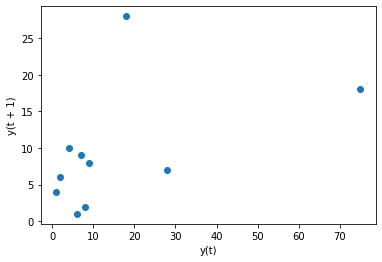

In [5]:
pd.plotting.lag_plot(dataset.loc[dataset.cidade.str.contains('Salvador'), 'total_confirmado_abs'])
plt.show()

In [15]:
def create_lag_columns(df, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        df: Input Pandas DataFrame.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = df.shape[1]
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s_ant%d' % (df.columns.to_list()[j], i)) for j in range(n_vars)]
    """
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += df.columns.to_list()
        else:
            names += [('%s_pos%d' % (df.columns.to_list()[j], i)) for j in range(n_vars)]
    """
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

lag_cols = ['evaporacao_piche', 'insolacao', 'precipitacao', 'temp_comp_media', 'temp_maxima', 'temp_minima',
            'umidade_relativa_media', 'velocidade_do_vento_media', 'google_trends_score', 'total_confirmado_abs']
df_lag_cols = create_lag_columns(dataset[lag_cols], 11, 1, False)
#df_lag_cols.corr().loc[df_lag_cols.corr()['evaporacao_piche_ant11'] > 0.7]
df_lag_cols

,evaporacao_piche_ant11,insolacao_ant11,precipitacao_ant11,temp_comp_media_ant11,temp_maxima_ant11,temp_minima_ant11,umidade_relativa_media_ant11,velocidade_do_vento_media_ant11,google_trends_score_ant11,total_confirmado_abs_ant11,evaporacao_piche_ant10,insolacao_ant10,precipitacao_ant10,temp_comp_media_ant10,temp_maxima_ant10,temp_minima_ant10,umidade_relativa_media_ant10,velocidade_do_vento_media_ant10,google_trends_score_ant10,total_confirmado_abs_ant10,evaporacao_piche_ant9,insolacao_ant9,precipitacao_ant9,temp_comp_media_ant9,temp_maxima_ant9,temp_minima_ant9,umidade_relativa_media_ant9,velocidade_do_vento_media_ant9,google_trends_score_ant9,total_confirmado_abs_ant9,evaporacao_piche_ant8,insolacao_ant8,precipitacao_ant8,temp_comp_media_ant8,temp_maxima_ant8,temp_minima_ant8,umidade_relativa_media_ant8,velocidade_do_vento_media_ant8,google_trends_score_ant8,total_confirmado_abs_ant8,evaporacao_piche_ant7,insolacao_ant7,precipitacao_ant7,temp_comp_media_ant7,temp_maxima_ant7,temp_minima_ant7,umidade_relativa_media_ant7,velocidade_do_vento_media_ant7,google_trends_score_ant7,total_confirmado_abs_ant7,...,evaporacao_piche_ant5,insolacao_ant5,precipitacao_ant5,temp_comp_media_ant5,temp_maxima_ant5,temp_minima_ant5,umidade_relativa_media_ant5,velocidade_do_vento_media_ant5,google_trends_score_ant5,total_confirmado_abs_ant5,evaporacao_piche_ant4,insolacao_ant4,precipitacao_ant4,temp_comp_media_ant4,temp_maxima_ant4,temp_minima_ant4,umidade_relativa_media_ant4,velocidade_do_vento_media_ant4,google_trends_score_ant4,total_confirmado_abs_ant4,evaporacao_piche_ant3,insolacao_ant3,precipitacao_ant3,temp_comp_media_ant3,temp_maxima_ant3,temp_minima_ant3,umidade_relativa_media_ant3,velocidade_do_vento_media_ant3,google_trends_score_ant3,total_confirmado_abs_ant3,evaporacao_piche_ant2,insolacao_ant2,precipitacao_ant2,temp_comp_media_ant2,temp_maxima_ant2,temp_minima_ant2,umidade_relativa_media_ant2,velocidade_do_vento_media_ant2,google_trends_score_ant2,total_confirmado_abs_ant2,evaporacao_piche_ant1,insolacao_ant1,precipitacao_ant1,temp_comp_media_ant1,temp_maxima_ant1,temp_minima_ant1,umidade_relativa_media_ant1,velocidade_do_vento_media_ant1,google_trends_score_ant1,total_confirmado_abs_ant1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [19]:
df_parcial = pd.concat([dataset[['ibge', 'uf', 'cidade', 'n_ano', 'n_mes',]],
                        df_lag_cols,
                        dataset[['t_agua', 't_banagua', 't_dens', 't_lixo', 't_luz', 'agua_esgoto', 'evaporacao_piche',
                                 'insolacao', 'precipitacao', 'temp_comp_media', 'temp_maxima', 'temp_minima',
                                 'umidade_relativa_media', 'velocidade_do_vento_media', 'google_trends_score',
                                 'total_confirmado_abs']]], axis=1)

In [20]:
# arquivo parcial gerado para o vinicius trabalhar uma versao de modelo em cima dele
# sera identico a nova versao final do arquivo lista_dados_sage_FINAL.csv, que sera ajustado no notebook Juncao_Final_Dados_SAGE

# csv
df_parcial.to_csv('../../data/FINAL/lista_dados_sage_PARCIAL.csv', index=False, sep=';')
# csv
df1 = pd.read_csv('../../data/FINAL/lista_dados_sage_PARCIAL.csv', sep=';')
df1

,ibge,uf,cidade,n_ano,n_mes,evaporacao_piche_ant11,insolacao_ant11,precipitacao_ant11,temp_comp_media_ant11,temp_maxima_ant11,temp_minima_ant11,umidade_relativa_media_ant11,velocidade_do_vento_media_ant11,google_trends_score_ant11,total_confirmado_abs_ant11,evaporacao_piche_ant10,insolacao_ant10,precipitacao_ant10,temp_comp_media_ant10,temp_maxima_ant10,temp_minima_ant10,umidade_relativa_media_ant10,velocidade_do_vento_media_ant10,google_trends_score_ant10,total_confirmado_abs_ant10,evaporacao_piche_ant9,insolacao_ant9,precipitacao_ant9,temp_comp_media_ant9,temp_maxima_ant9,temp_minima_ant9,umidade_relativa_media_ant9,velocidade_do_vento_media_ant9,google_trends_score_ant9,total_confirmado_abs_ant9,evaporacao_piche_ant8,insolacao_ant8,precipitacao_ant8,temp_comp_media_ant8,temp_maxima_ant8,temp_minima_ant8,umidade_relativa_media_ant8,velocidade_do_vento_media_ant8,google_trends_score_ant8,total_confirmado_abs_ant8,evaporacao_piche_ant7,insolacao_ant7,precipitacao_ant7,temp_comp_media_ant7,temp_maxima_ant7,...,umidade_relativa_media_ant4,velocidade_do_vento_media_ant4,google_trends_score_ant4,total_confirmado_abs_ant4,evaporacao_piche_ant3,insolacao_ant3,precipitacao_ant3,temp_comp_media_ant3,temp_maxima_ant3,temp_minima_ant3,umidade_relativa_media_ant3,velocidade_do_vento_media_ant3,google_trends_score_ant3,total_confirmado_abs_ant3,evaporacao_piche_ant2,insolacao_ant2,precipitacao_ant2,temp_comp_media_ant2,temp_maxima_ant2,temp_minima_ant2,umidade_relativa_media_ant2,velocidade_do_vento_media_ant2,google_trends_score_ant2,total_confirmado_abs_ant2,evaporacao_piche_ant1,insolacao_ant1,precipitacao_ant1,temp_comp_media_ant1,temp_maxima_ant1,temp_minima_ant1,umidade_relativa_media_ant1,velocidade_do_vento_media_ant1,google_trends_score_ant1,total_confirmado_abs_ant1,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,evaporacao_piche,insolacao,precipitacao,temp_comp_media,temp_maxima,temp_minima,umidade_relativa_media,velocidade_do_vento_media,google_trends_score,total_confirmado_abs
0,110001,RO,Alta Floresta D'Oeste,2016,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71,0
1,110001,RO,Alta Floresta D'Oeste,2016,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,0
2,110001,RO,Alta Floresta D'Oeste,2016,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0.0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55,0
3,110002,RO,Ariquemes,2016,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 21 columns):
ibge                         17728 non-null int64
uf                           17728 non-null object
cidade                       17728 non-null object
n_ano                        17728 non-null int64
n_mes                        17728 non-null int64
total_confirmado_abs         17728 non-null int64
t_agua                       17728 non-null float64
t_banagua                    17728 non-null float64
t_dens                       17728 non-null float64
t_lixo                       17728 non-null float64
t_luz                        17728 non-null float64
agua_esgoto                  17728 non-null float64
evaporacao_piche             17728 non-null float64
insolacao                    17728 non-null float64
precipitacao                 17728 non-null float64
temp_comp_media              17728 non-null float64
temp_maxima                  17728 non-null float64
temp_minima      

### Análise Descritiva

In [ ]:
dataset.shape

In [ ]:
dataset.describe(include='all')

In [ ]:
dataset

### Feature Engineering

Serão criadas as seguintes colunas:
* **`total_confirmado_abs_1m`**: Equivale ao conteúdo da coluna **`total_confirmado_abs`** do mês anterior dentro do respectivo município;
* **`total_confirmado_acum_2m`**: Acumulado dos 2 meses anteriores (exclui o atual) para a coluna **`total_confirmado_abs`** dentro do respectivo município;
* **`total_confirmado_acum_3m`**: Acumulado dos 3 meses anteriores (exclui o atual) para a coluna **`total_confirmado_abs`** dentro do respectivo município;
* **`estacao_ano`**: Estação do ano (verao = 1; outono = 2; inverno = 3; primavera = 4);
* **`n_trimestre`**: Trimestre do mês;

Para os totais acumulados, será criado um Dataframe auxiliar (**`df_ibge_ano_mes`**) contendo todos os 12 meses para cada municipio, de forma a calcular corretamente os meses acumulados.

In [21]:
# este dataframe serve para, ao juntar com a base original, preencher as lacunas de meses inexistentes na base original.
# isso e necessario para gerar os acumulados dos ultimos 2, 3 e 4 meses

# lista com os anos distintos da base original
n_ano_list = dataset.n_ano.unique().tolist()

# lista fixa com os numeros dos meses de um ano (de 1 a 12)
n_mes_list = list(range(1, 13))

# lista com os codigos ibge distintos da base original
ibge_list = dataset.ibge.unique().tolist()

# gera uma lista aninhada em 3 niveis, combinando cada elemento das 3 listas anteriores para formar um dicionario
# o objetivo aqui e gerar uma linha para cada combinacao distinta de {n_ano, n_mes, ibge}
list_of_list = [[[{'n_ano': i, 'n_mes': j, 'ibge': k} for i in n_ano_list] for j in n_mes_list] for k in ibge_list]

# transforma a lista aninhada em uma lista simples de dicionarios
list_of_dict = [item for l3 in list_of_list for l2 in l3 for item in l2]

# gera o dataframe a partir da lista de dicionarios
df_ibge_ano_mes = pd.DataFrame(list_of_dict)
df_ibge_ano_mes

,ibge,n_ano,n_mes
0,110001,2016,1
1,110001,2016,2
2,110001,2016,3
3,110001,2016,4
4,110001,2016,5
5,110001,2016,6
6,110001,2016,7
7,110001,2016,8
8,110001,2016,9
9,110001,2016,10


In [24]:
# junta (merge) os dataframes df_ibge_ano_mes e dataset, gerando linhas com NaN para os meses em que
# a base original nao possui registros
dataset2 = pd.merge(df_ibge_ano_mes, dataset, on = ['ibge', 'n_ano', 'n_mes'], how = 'left')

# ordena a base para garantir que os totais acumulados serao correspondentes aos meses adjacentes
dataset2.sort_values(by = ['ibge', 'n_ano', 'n_mes'], inplace = True)

# trataremos aqui apenas a coluna total_confirmado_abs, pois essas linhas geradas serao removidas apos
# o calculo dos dados acumulados
dataset2.loc[dataset2.total_confirmado_abs.isnull(), 'total_confirmado_abs'] = 0
dataset2.total_confirmado_abs = dataset2.total_confirmado_abs.astype(int)

# cria as colunas total_confirmado_abs_1m, total_confirmado_acum_2m e total_confirmado_acum_3m
df_2m = dataset2[['total_confirmado_abs']].shift(periods=1, fill_value=0).rename(columns = {'total_confirmado_abs': 'total_confirmado_abs_1m'})
df_3m = dataset2[['total_confirmado_abs']].shift(periods=2, fill_value=0).rename(columns = {'total_confirmado_abs': 'total_confirmado_acum_2m'})
df_4m = dataset2[['total_confirmado_abs']].shift(periods=3, fill_value=0).rename(columns = {'total_confirmado_abs': 'total_confirmado_acum_3m'})

# junta as colunas criadas ao dataframe original
dataset2 = pd.concat([dataset2, df_2m, df_3m, df_4m], axis = 1)

# zera os acumulados que envolvem dados de outros municipios, deslocados pela funcao shift
dataset2.loc[dataset2.ibge != dataset2.ibge.shift(periods=1), 'total_confirmado_abs_1m'] = 0
dataset2.loc[dataset2.ibge != dataset2.ibge.shift(periods=2), 'total_confirmado_acum_2m'] = 0
dataset2.loc[dataset2.ibge != dataset2.ibge.shift(periods=3), 'total_confirmado_acum_3m'] = 0

# por fim, soma os dados absolutos para gerar os acumulados dos ultimos 3 e 2 meses (nesta ordem, para nao distorcer os acumulados)
dataset2.total_confirmado_acum_3m = dataset2.total_confirmado_abs_1m + dataset2.total_confirmado_acum_2m + dataset2.total_confirmado_acum_3m
dataset2.total_confirmado_acum_2m = dataset2.total_confirmado_abs_1m + dataset2.total_confirmado_acum_2m

# descarta as linhas inseridas apenas para o calculo dos acumulados
dataset2 = dataset2.loc[dataset2.uf.notnull()]
dataset2

,ibge,n_ano,n_mes,uf,cidade,total_confirmado_abs,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,evaporacao_piche,insolacao,precipitacao,temp_comp_media,temp_maxima,temp_minima,umidade_relativa_media,velocidade_do_vento_media,google_trends_score,total_confirmado_abs_1m,total_confirmado_acum_2m,total_confirmado_acum_3m
9,110001,2016,10,RO,Alta Floresta D'Oeste,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0,0,0
10,110001,2016,11,RO,Alta Floresta D'Oeste,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0,0,0
11,110001,2016,12,RO,Alta Floresta D'Oeste,0,93.69,80.20,22.58,94.05,93.98,9.31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.0,0,0,0
21,110002,2016,10,RO,Ariquemes,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0,0,0
22,110002,2016,11,RO,Ariquemes,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0,0,0
23,110002,2016,12,RO,Ariquemes,0,98.54,85.35,27.15,96.72,98.58,11.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.0,0,0,0
33,110011,2016,10,RO,Jaru,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.0,0,0,0
34,110011,2016,11,RO,Jaru,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0,0,0
35,110011,2016,12,RO,Jaru,0,97.09,82.81,19.09,95.04,99.40,15.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.0,0,0,0
37,110012,2016,2,RO,Ji-Paraná,0,97.81,89.31,23.30,95.36,99.35,5.87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.0,0,0,0


In [ ]:
# formato: {mes: estacao}, onde as estacoes do ano sao:
# verao = 1
# outono = 2
# inverno = 3
# primavera = 4
month_to_season = {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
month_to_season

In [ ]:
# cria as colunas estacao_ano e n_trimestre e reorganiza as colunas
dataset2['estacao_ano'] = dataset2.n_mes.map(month_to_season)
dataset2['n_trimestre'] = np.ceil(dataset2.n_mes/3).astype(int)
dataset2 = dataset2[['ibge', 'n_ano', 'n_mes', 'uf', 'cidade',
       't_agua', 't_banagua', 't_dens', 't_lixo', 't_luz', 'agua_esgoto',
       'evaporacao_piche', 'insolacao', 'precipitacao', 'temp_comp_media',
       'temp_maxima', 'temp_minima', 'umidade_relativa_media', 'velocidade_do_vento_media',
       'google_trends_score', 'estacao_ano', 'n_trimestre',
       'total_confirmado_abs_1m', 'total_confirmado_acum_2m',
       'total_confirmado_acum_3m', 'total_confirmado_abs']]
dataset2

In [ ]:
dataset2.info()

### Tratamento das variáveis categóricas

Os campos abaixo, apesar de serem do tipo numérico, são na verdade variáveis categóricas, uma vez que seu conteúdo não tem valor matemático, e sim, de identificação:
* **`ibge`**;
* **`n_ano`**;
* **`n_mes`**;
* **`estacao_ano`**;
* **`n_trimestre`**;

Entretanto, os campos abaixo serão descartados do modelo pelos seguintes motivos:
* **`ibge`**: Representa cada município e seu respectivo estado (que já possuem os campos **`uf`** e **`cidade`** para representá-los diretamente);
* **`n_ano`**: Possui um único valor, uma vez que a base possui dados apenas do ano de 2016;

Dessa forma, apenas as variáveis abaixo serão tratadas:
* **`uf`**;
* **`cidade`**;
* **`n_mes`**;
* **`estacao_ano`**;
* **`n_trimestre`**;

In [ ]:
dataset2.columns

In [ ]:
dataset3 = dataset2.drop(columns = ['ibge', 'n_ano'])

In [ ]:
'''
X = dataset3.drop(columns = ['total_confirmado_abs'])
y = dataset3.total_confirmado_abs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
'''

X = dataset.drop(columns = ['ibge', 'n_ano', 'total_confirmado_abs'])
y = dataset.total_confirmado_abs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
dataset.info()

In [ ]:
from category_encoders import OneHotEncoder, BinaryEncoder

#encoder = OrdinalEncoder(cols = ['n_mes', 'uf', 'cidade', 'estacao_ano', 'n_trimestre'])
encoder = OneHotEncoder(cols = ['n_mes', 'uf'])

encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

encoder = BinaryEncoder(cols = 'cidade')

encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, reg.predict(X_test))
print("R2: %.4f" % r2)

In [ ]:
X_train.head()

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [5, 10, 15],
                     'max_features': [1, 5, 10],
                     'n_estimators': [10, 30, 50]}]

clf = GridSearchCV(RandomForestRegressor(random_state=11),
                   tuned_parameters, cv=5, scoring='r2')
clf.fit(X_train, y_train)

In [ ]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
r2 = r2_score(y_test, clf.predict(X_test))
print("R2: %.4f" % r2)

In [ ]:
tuned_parameters = {'max_depth': clf.best_params_['max_depth'],
                    'n_estimators': clf.best_params_['n_estimators'],
                    'max_features': clf.best_params_['max_features'],
                    'random_state': 11}

reg = RandomForestRegressor(**tuned_parameters)
reg.fit(X_train, y_train)

In [ ]:
# Set figure width and height
plt.rcParams["figure.figsize"] = [5, 10]

names = X_train.columns
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, map(lambda x: names[x], sorted_idx))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(max_depth = clf.best_params_['max_depth'],
                                  n_estimators = clf.best_params_['n_estimators'],
                                  max_features = clf.best_params_['max_features'],
                                  random_state = 11)

plot_learning_curve(estimator, title, X_train, y_train, ylim=(0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

estimator = RandomForestRegressor(max_depth = clf.best_params_['max_depth'],
                                  n_estimators = clf.best_params_['n_estimators'],
                                  max_features = clf.best_params_['max_features'],
                                  random_state = 11)

scores = cross_val_score(estimator, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))